# Loan Prediction Practice Problem

In [37]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
train = pd.read_csv("C:/Users/Rohit/Downloads/Train_Loan_Prediction.csv")
test = pd.read_csv("C:/Users/Rohit/Downloads/Test_Loan_Prediction.csv")

In [39]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Details of Loan Prediction Model

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Null Value Count

In [43]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Feature Engineering and Missing Value Imputations -

### Dependents 

In [45]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [46]:
train.replace({'3+':4},inplace = True)
test.replace({'3+':4},inplace = True)

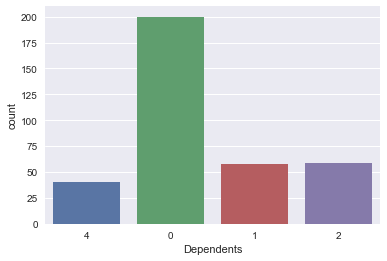

In [47]:
sns.countplot(x='Dependents',data=test)

In [48]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])

Filled the missing values with 0

### Dropping Loan_ID

In [49]:
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)

### Loan_Amount_Term

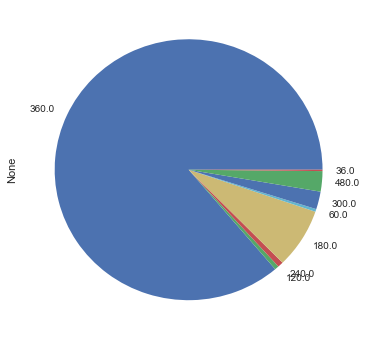

In [50]:
loan_grouped = train.groupby('Loan_Amount_Term')['Loan_Amount_Term'].transform('count')
count=loan_grouped.unique()
count=pd.Series(count)
loan_unique = train['Loan_Amount_Term'].unique()
count.plot.pie(figsize=(6,6),labels = loan_unique)

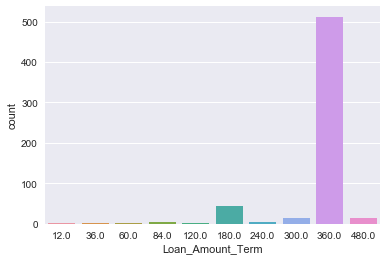

In [51]:
sns.countplot(x='Loan_Amount_Term',data=train)

In [52]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])

### Gender

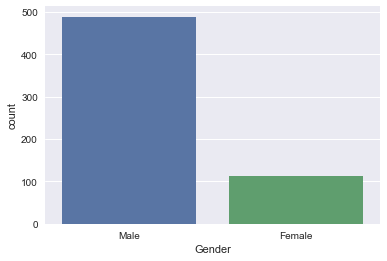

In [53]:
sns.countplot(x='Gender',data=train)

In [54]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])

### Self_Employed - 

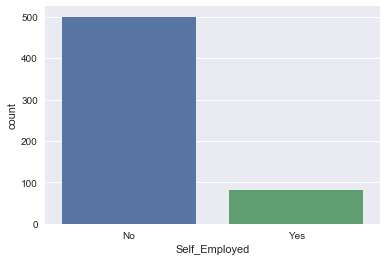

In [55]:
sns.countplot(x='Self_Employed',data=train)

In [56]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

### Credit History

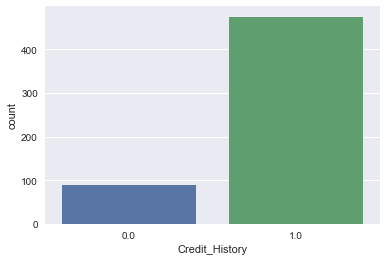

In [57]:
sns.countplot(x='Credit_History',data=train)

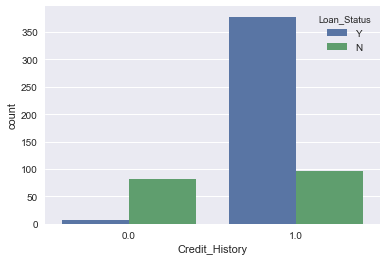

In [58]:
sns.countplot(x='Credit_History', hue="Loan_Status", data=train)

In [59]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

### Loan Amount

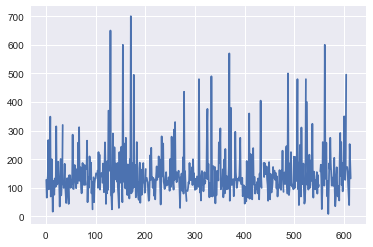

In [60]:
plt.plot(train['LoanAmount'])

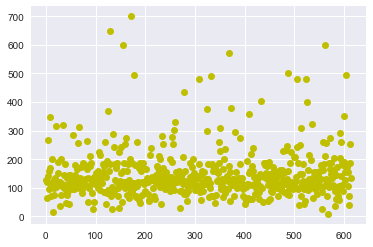

In [61]:
plt.plot(train['LoanAmount'],'yo')

In [62]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())

### Married

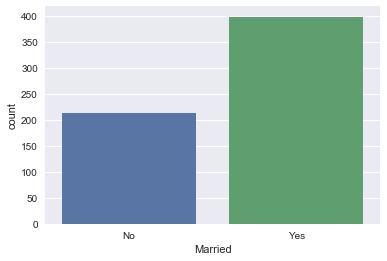

In [63]:
sns.countplot(x='Married',data=train)

In [64]:
train = train.dropna()

Drppoed the three rows with missing values in Married column.

### Sum_Income
Created a new column 'sum_income' by adding 'ApplicantIncome' and 'CoapplicantIncome'

In [65]:
train['sum_income'] = train['ApplicantIncome']+train['CoapplicantIncome']

### Ratio
Created a new column ratio by LoanAmount/sum_income

In [66]:
train['ratio'] = train['LoanAmount']/train['sum_income']

## Categorical Variables - 

In [67]:
train['Gender'].replace('Male',1,inplace=True)
train['Gender'].replace('Female',0,inplace=True)

train['Married'].replace('No',0,inplace=True)
train['Married'].replace('Yes',1,inplace=True)

train['Education'].replace('Graduate',1,inplace=True)
train['Education'].replace('Not Graduate',0,inplace=True)

train['Self_Employed'].replace('No',1,inplace=True)
train['Self_Employed'].replace('Yes',0,inplace=True)

train['Loan_Status'].replace('N',1,inplace=True)
train['Loan_Status'].replace('Y',0,inplace=True)

In [68]:
test['Gender'].replace('Male',1,inplace=True)
test['Gender'].replace('Female',0,inplace=True)

test['Married'].replace('No',0,inplace=True)
test['Married'].replace('Yes',1,inplace=True)

test['Education'].replace('Graduate',1,inplace=True)
test['Education'].replace('Not Graduate',0,inplace=True)

test['Self_Employed'].replace('No',1,inplace=True)
test['Self_Employed'].replace('Yes',0,inplace=True)

In [69]:
X = train
X = pd.get_dummies(X)

### Correlation

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,sum_income,ratio
Gender,1.000000,0.367926,-0.044560,0.001284,0.061997,0.082028,0.108139,-0.082177,0.010004,-0.019381,0.095791,-0.107323
Married,0.367926,1.000000,-0.014223,-0.005904,0.051332,0.077770,0.146981,-0.102624,0.009481,-0.089280,0.083776,-0.016513
Education,-0.044560,-0.014223,1.000000,-0.011414,0.140590,0.063585,0.166859,0.073701,0.072670,-0.084286,0.161765,-0.082658
Self_Employed,0.001284,-0.005904,-0.011414,1.000000,-0.127550,0.017019,-0.115501,0.033421,0.000757,-0.002404,-0.112919,0.069384
ApplicantIncome,0.061997,0.051332,0.140590,-0.127550,1.000000,-0.116266,0.566037,-0.044361,-0.018900,0.005154,0.893069,-0.312072
CoapplicantIncome,0.082028,0.077770,0.063585,0.017019,-0.116266,1.000000,0.188147,-0.059135,0.012093,0.057733,0.343035,-0.199788
LoanAmount,0.108139,0.146981,0.166859,-0.115501,0.566037,0.188147,1.000000,0.036135,-0.001633,0.036789,0.620551,0.151620
Loan_Amount_Term,-0.082177,-0.102624,0.073701,0.033421,-0.044361,-0.059135,0.036135,1.000000,-0.005291,0.023619,-0.068741,0.156147
Credit_History,0.010004,0.009481,0.072670,0.000757,-0.018900,0.012093,-0.001633,-0.005291,1.000000,-0.540021,-0.012396,-0.038848
Loan_Status,-0.019381,-0.089280,-0.084286,-0.002404,0.005154,0.057733,0.036789,0.023619,-0.540021,1.000000,0.031027,0.093346


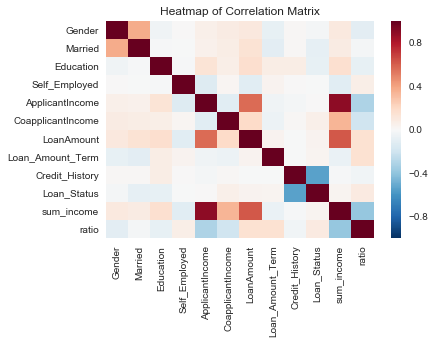

In [70]:
corr = train.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

### Train and Test data separation

In [71]:
X_train = X.drop("Loan_Status",axis=1)
Y_train = X["Loan_Status"]
X_test  = test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

## Logistic Regression

In [72]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(x_test)

#### ROC Curve

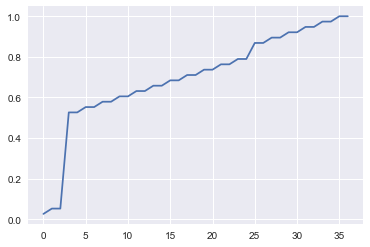

In [73]:
#ROC Curve
from sklearn import metrics
a=model.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, a)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(tpr)
plt.show()

#### Using Inbuilt Funtion

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
print('Confusion Metrix :')
print(confusion_matrix(y_test,y_pred))

Confusion Metrix :
[[84  1]
 [19 19]]


#### Manually

In [75]:
Y_train = np.array(y_test)
tp=0.0
fp=0.0
fn=0.0
tn=0.0
for i in range(y_pred.size):
    if y_pred[i]==1 and Y_train[i]==1:
        tp = tp+1
    if y_pred[i]==1 and Y_train[i]==0:
        fn = fn+1
    if y_pred[i]==0 and Y_train[i]==0:
        tn=tn+1
    if y_pred[i]==0 and Y_train[i]==1:
        fp = fp+1
print('TP : '+str(tp))
print('FP : '+str(fp))
print('TN : '+str(tn))
print('FN : '+str(fn))

accuracy = (tp+tn)/(tp+fp+tn+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

print('Accuracy : '+str(accuracy))
print('Precision : '+str(precision))
print('Recall : '+str(recall))
print('AUC : '+str(auc(fpr, tpr)))
F1_Score = 2*(recall * precision) / (recall + precision)
print('F1 Score : '+str(F1_Score))

TP : 19.0
FP : 19.0
TN : 84.0
FN : 1.0
Accuracy : 0.837398373984
Precision : 0.5
Recall : 0.95
AUC : 0.841176470588
F1 Score : 0.655172413793


## Decision Tree

In [76]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
fit_model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#### ROC Curve

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
print('Confusion Metrix :')
print(confusion_matrix(y_test,y_pred))
Y_train = np.array(y_test)
tp=0.0
fp=0.0
fn=0.0
tn=0.0
for i in range(y_pred.size):
    if y_pred[i]==1 and Y_train[i]==1:
        tp = tp+1
    if y_pred[i]==1 and Y_train[i]==0:
        fn = fn+1
    if y_pred[i]==0 and Y_train[i]==0:
        tn=tn+1
    if y_pred[i]==0 and Y_train[i]==1:
        fp = fp+1
print('TP : '+str(tp))
print('FP : '+str(fp))
print('TN : '+str(tn))
print('FN : '+str(fn))

accuracy = (tp+tn)/(tp+fp+tn+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

print('Accuracy : '+str(accuracy))
print('Precision : '+str(precision))
print('Recall : '+str(recall))
print('AUC : '+str(auc(fpr, tpr)))
F1_Score = 2*(recall * precision) / (recall + precision)
print('F1 Score : '+str(F1_Score))

Confusion Metrix :
[[70 15]
 [14 24]]
TP : 24.0
FP : 14.0
TN : 70.0
FN : 15.0
Accuracy : 0.764227642276
Precision : 0.631578947368
Recall : 0.615384615385
AUC : 0.841176470588
F1 Score : 0.623376623377


## KNN(K-Nearest Neighbour Algorithm)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5) # default value for n_neighbors is 5
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#### ROC Curve

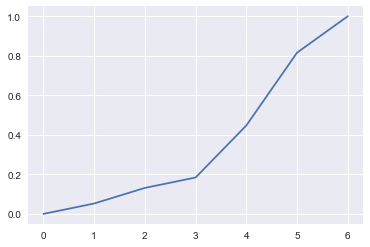

In [79]:
from sklearn import metrics
a=model.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, a)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(tpr)
plt.show()

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
print('Confusion Metrix :')
print(confusion_matrix(y_test,y_pred))
Y_train = np.array(y_test)
tp=0.0
fp=0.0
fn=0.0
tn=0.0
for i in range(y_pred.size):
    if y_pred[i]==1 and Y_train[i]==1:
        tp = tp+1
    if y_pred[i]==1 and Y_train[i]==0:
        fn = fn+1
    if y_pred[i]==0 and Y_train[i]==0:
        tn=tn+1
    if y_pred[i]==0 and Y_train[i]==1:
        fp = fp+1
print('TP : '+str(tp))
print('FP : '+str(fp))
print('TN : '+str(tn))
print('FN : '+str(fn))

accuracy = (tp+tn)/(tp+fp+tn+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

print('Accuracy : '+str(accuracy))
print('Precision : '+str(precision))
print('Recall : '+str(recall))
print('AUC : '+str(auc(fpr, tpr)))
F1_Score = 2*(recall * precision) / (recall + precision)
print('F1 Score : '+str(F1_Score))

Confusion Metrix :
[[68 17]
 [31  7]]
TP : 7.0
FP : 31.0
TN : 68.0
FN : 17.0
Accuracy : 0.609756097561
Precision : 0.184210526316
Recall : 0.291666666667
AUC : 0.508513931889
F1 Score : 0.225806451613


## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

#### ROC Curve

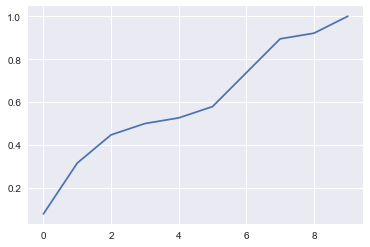

In [82]:
from sklearn import metrics
a=model.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, a)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(tpr)
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
print('Confusion Metrix :')
print(confusion_matrix(y_test,y_pred))
Y_train = np.array(y_test)
tp=0.0
fp=0.0
fn=0.0
tn=0.0
for i in range(y_pred.size):
    if y_pred[i]==1 and Y_train[i]==1:
        tp = tp+1
    if y_pred[i]==1 and Y_train[i]==0:
        fn = fn+1
    if y_pred[i]==0 and Y_train[i]==0:
        tn=tn+1
    if y_pred[i]==0 and Y_train[i]==1:
        fp = fp+1
print('TP : '+str(tp))
print('FP : '+str(fp))
print('TN : '+str(tn))
print('FN : '+str(fn))

accuracy = (tp+tn)/(tp+fp+tn+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

print('Accuracy : '+str(accuracy))
print('Precision : '+str(precision))
print('Recall : '+str(recall))
print('AUC : '+str(auc(fpr, tpr)))
F1_Score = 2*(recall * precision) / (recall + precision)
print('F1 Score : '+str(F1_Score))

Confusion Metrix :
[[81  4]
 [18 20]]
TP : 20.0
FP : 18.0
TN : 81.0
FN : 4.0
Accuracy : 0.821138211382
Precision : 0.526315789474
Recall : 0.833333333333
AUC : 0.800309597523
F1 Score : 0.645161290323
